# Задача

Дана статистика заболеваемости коронавирусом за определенный промежуток в разных странах, записанная в файл covid-19cases.csv. Необходимо:


- Произвести очистку данных, убрав пустые столбцы и неинформативные строки (строки, выделенные для заметок for Notes).
- Определить статистику случаев заражения в разных частях света (столбец continent) за каждый месяц.
- Определить корреляцию каждой части света с другой.
- Вывести название части света, которая меньше всего коррелирует с другими

Поле	Комментарий
- date	Дата
- continent	Часть света
- location	Местоположение
- total_cases	Общее количество случаев
- new_cases	Новые случаи заражения
- new_cases_smoothed	Новые случаи заражения сглаженно
- total_deaths	Общее количество смертей
- new_deaths	Количество новых смертей
- new_deaths_smoothed	Количество смертей сглаженно
- total_cases_per_million	Число случаев заражения на миллион
- new_cases_per_million	Новые случаи заражения на миллион
- new_cases_smoothed_per_million	Новые случаи заражения на миллион сглаженно
- total_deaths_per_million	Число смертей на миллион
- new_deaths_per_million	Число новых смертей на миллион
- new_deaths_smoothed_per_million	Число новых смертей на миллион сглаженно
- total_tests	Число тестов
- new_tests	Число новых тестов
- total_tests_per_thousand	Количество тестов на тысячу
- new_tests_per_thousand	Количество новых тестов на тысячу
- new_tests_smoothed	Количество новых тестов сглаженно
- new_tests_smoothed_per_thousand	Количество новых тестов на тысячу сглаженно
- tests_per_case	Число тестов на случай заражения
- positive_rate	Число положительных результатов
- tests_units	Число единиц тестов
- stringency_index	Индекс строгости
- population	Население
- population_density	Плотность населения
- median_age	Средний возраст
- aged_65_older	Число людей старше 65
- aged_70_older	Число людей старше 70
- gdp_per_capita	ВВП на душу населения
- extreme_poverty	Крайняя бедность
- cardiovasc_death_rate	Уровень смертности от сердечно-сосудистых заболеваний
- diabetes_prevalence	Распространененность диабета
- female_smokers	Число курящих женщин

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import seaborn as sns

# Данные

In [28]:
data = pd.read_csv('covid-19cases.csv', index_col='Unnamed: 0')

In [29]:
pd.set_option('display.max_columns', None)

In [30]:
data

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
1,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
3,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105743,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105744,26-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0
105745,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105746,27-10-20,NaN,International,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105748 entries, 0 to 105747
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   date                             105748 non-null  object 
 1   continent                        52269 non-null   object 
 2   location                         52873 non-null   object 
 3   total_cases                      49259 non-null   float64
 4   new_cases                        51979 non-null   float64
 5   new_cases_smoothed               51185 non-null   float64
 6   total_deaths                     40323 non-null   float64
 7   new_deaths                       51979 non-null   float64
 8   new_deaths_smoothed              51185 non-null   float64
 9   total_cases_per_million          48993 non-null   float64
 10  new_cases_per_million            51915 non-null   float64
 11  new_cases_smoothed_per_million   51120 non-null   float64
 12  to

In [33]:
data = data.drop(['Unnamed: 40', 'Unnamed: 41'], axis=1)

В столбце 'date' For Notes: встречается достаточно часто и все значения признаков в этих строках NaN, поэтому удаляем их.

In [34]:
data['date'].value_counts()

For Notes:     52875
19-10-20         214
17-10-20         214
20-10-20         214
18-10-20         214
               ...  
28-01-20          68
26-01-20          68
13-01-20          68
16-01-20          68
14-01-20          68
Name: date, Length: 303, dtype: int64

In [35]:
print(data[data['date'] == 'For Notes: '].shape)
data[data['date'] == 'For Notes: '].iloc[:, 2:].isnull().sum()

(52875, 43)


location                           52875
total_cases                        52875
new_cases                          52875
new_cases_smoothed                 52875
total_deaths                       52875
new_deaths                         52875
new_deaths_smoothed                52875
total_cases_per_million            52875
new_cases_per_million              52875
new_cases_smoothed_per_million     52875
total_deaths_per_million           52875
new_deaths_per_million             52875
new_deaths_smoothed_per_million    52875
total_tests                        52875
new_tests                          52875
total_tests_per_thousand           52875
new_tests_per_thousand             52875
new_tests_smoothed                 52875
new_tests_smoothed_per_thousand    52875
tests_per_case                     52875
positive_rate                      52875
tests_units                        52875
stringency_index                   52875
population                         52875
population_densi

In [36]:
data.shape

(105748, 43)

In [37]:
for_note_idx = data[data['date'] == 'For Notes: '].index
data = data.drop(for_note_idx, axis=0)

In [38]:
data.shape

(52873, 43)

Переведем 'date' в соответствующий формат

In [39]:
data['date'] = pd.to_datetime(data['date'], dayfirst = True)
data['date'].head()

0   2020-03-13
2   2020-03-19
4   2020-03-20
6   2020-03-21
8   2020-03-22
Name: date, dtype: datetime64[ns]

# Обработка данных

In [42]:
qq = data[(data['continent'] == 'North America') & (data['location']=='Mexico')]
qq

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
62941,2019-12-31,North America,Mexico,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,12.0,19.0
62943,2020-01-01,North America,Mexico,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,25.0,25.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,0.00,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,1.0,20.0
62945,2020-01-02,North America,Mexico,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,97.0,72.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,0.00,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,1.0,20.0
62947,2020-01-03,North America,Mexico,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,186.0,89.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,0.00,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,1.0,20.0
62949,2020-01-04,North America,Mexico,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,231.0,45.0,0.002,0.000,NaN,NaN,NaN,NaN,people tested,0.00,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63535,2020-10-23,North America,Mexico,874171.0,6612.0,3920.571,87894.0,479.0,372.714,6780.054,51.283,30.408,681.704,3.715,2.891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,10.0,20.0
63537,2020-10-24,North America,Mexico,880775.0,6604.0,4809.714,88312.0,418.0,372.571,6831.274,51.220,37.304,684.946,3.242,2.890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,10.0,20.0
63539,2020-10-25,North America,Mexico,886800.0,6025.0,5270.429,88743.0,431.0,383.429,6878.004,46.730,40.877,688.289,3.343,2.974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,10.0,20.0
63541,2020-10-26,North America,Mexico,891160.0,4360.0,5704.714,88924.0,181.0,393.857,6911.820,33.816,44.246,689.693,1.404,3.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774,MEX,10.0,20.0


Структура датасета: данные сгруппированы сначла по континенту 'continent', затем по стране 'location'. В каждой группе приведены измерения за каждый день, даты расположены по порядку.

Так же добавлены дополнительные признаки: разница с предыдущим днем, а также значения полученные усреднением по группе с окном 7, т.е. например:

new_cases = ['total_cases'].diff()
new_cases_smoothed = ['new_cases'].rolling(window=7).mean()

В конце датаеста расположены данные с location = 'World', 'International'.

Континенты в датасете:

In [71]:
print(*data['continent'].unique(), sep='\n')

North America
Asia
Africa
Europe
South America
Oceania
nan


Строки, где континент NaN, соответствуют данным по всему миру:

In [73]:
data[data['continent'].isnull()]['location'].unique()

array(['World', 'International'], dtype=object)

Для удобства дальнейшего анализа создадим датасеты, где в каждом столбце будут усредненные по странам значения признаков для каждого континента, отсортированные по дате. Это позволит сравнить распостранение вируса по континентам

In [104]:
def group_by_day_mean(feature):
    groups = data.groupby(by=['continent', 'date'])[feature].agg([np.mean])
    groups = groups.unstack(level=0)
    groups.columns = groups.columns.droplevel(0)
    return groups

In [105]:
group_mean_new_cases = group_by_day_mean('new_cases_smoothed')
group_mean_new_cases

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-10-23,189.280527,2043.854043,3351.958020,1998.376917,33.1143,3940.494385
2020-10-24,191.418218,2032.242261,3588.085660,2090.059556,39.4857,3938.945154
2020-10-25,185.467509,2021.425413,3751.311340,2209.091278,39.5714,3981.758231


Проиллюстрируем 'new_cases_smoothed' и 'new_deaths_smoothed' для всего континента и по странам:

In [106]:
def plot_means_groups(feature1, feature2, continent):
    group1 = group_by_day_mean(feature1)
    group2 = group_by_day_mean(feature2)
    
    fig, ax = plt.subplots(2,2, figsize=(15, 7))
    fig.suptitle(continent.upper())
    
    ax[0,0].plot(group1.index, group1[continent])
    ax[1,0].plot(data[data['continent']==continent]['date'].values, data[data['continent']==continent][feature1].values)
    ax[0,0].set_title(feature1)
    #ax[0,0].ylabel('Whole continent')
    
    ax[0,1].plot(group2.index, group2[continent])
    ax[1,1].plot(data[data['continent']==continent]['date'].values, data[data['continent']==continent][feature2].values)
    ax[0,1].set_title(feature2)
    #ax[0,1].ylabel('By country')
    
    plt.show()

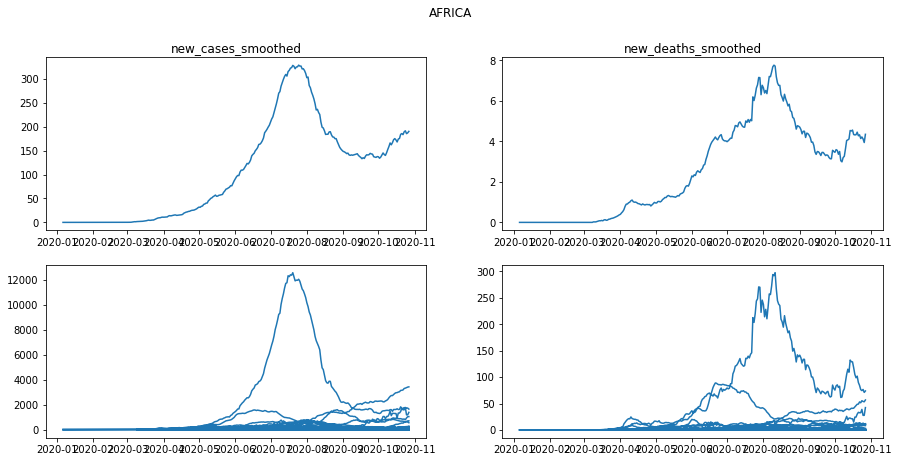

In [107]:
plot_means_groups('new_cases_smoothed', 'new_deaths_smoothed', 'Africa')

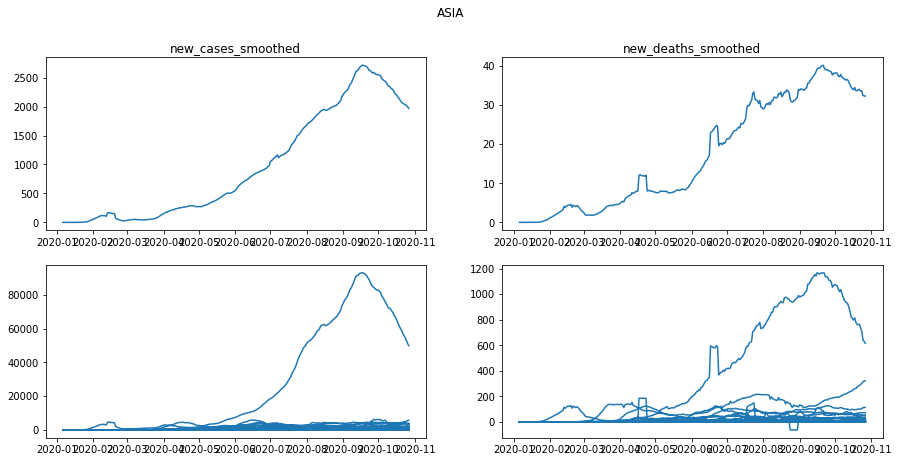

In [108]:
plot_means_groups('new_cases_smoothed', 'new_deaths_smoothed', 'Asia')

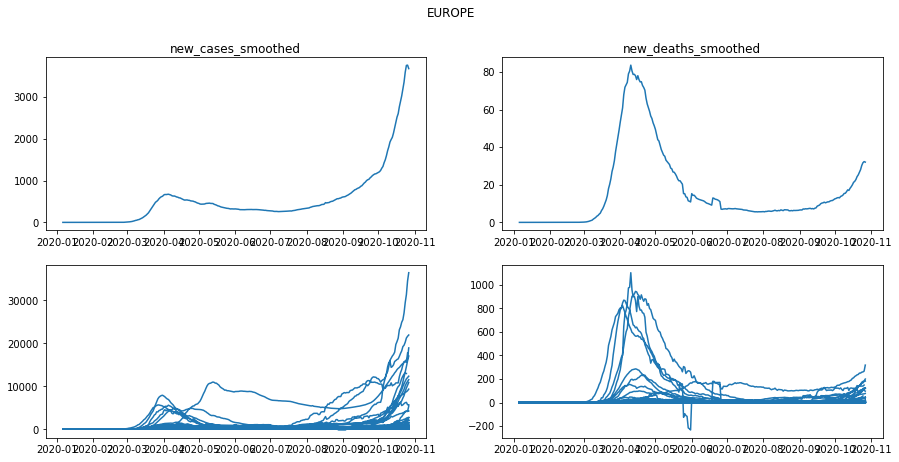

In [109]:
plot_means_groups('new_cases_smoothed', 'new_deaths_smoothed', 'Europe')

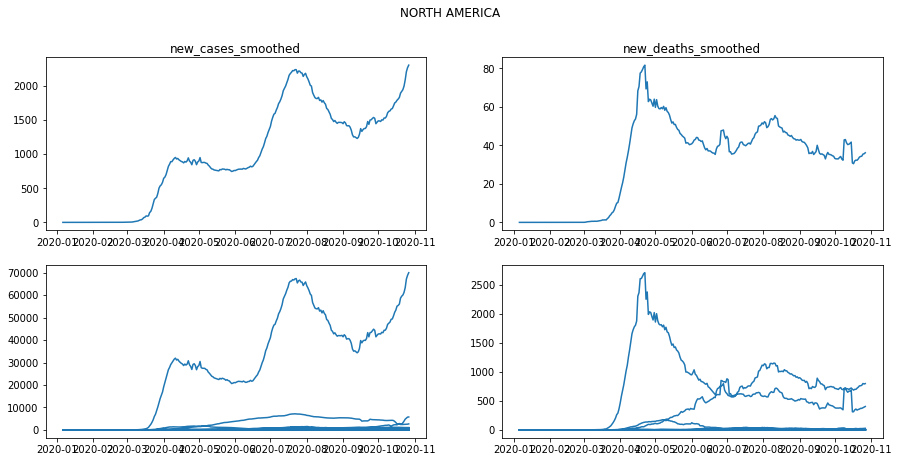

In [110]:
plot_means_groups('new_cases_smoothed', 'new_deaths_smoothed', 'North America')

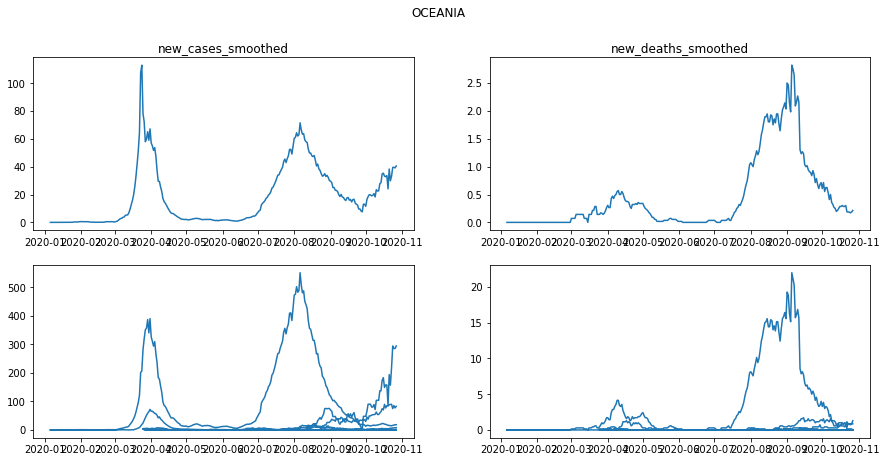

In [111]:
plot_means_groups('new_cases_smoothed', 'new_deaths_smoothed', 'Oceania')

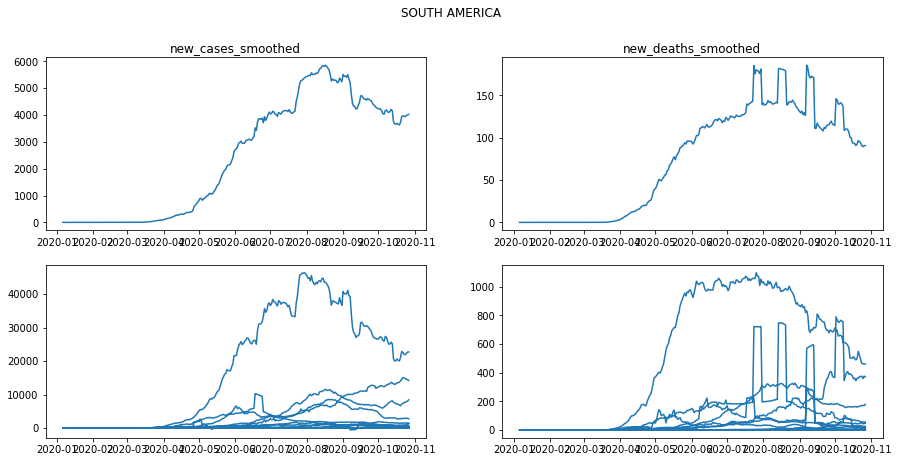

In [112]:
plot_means_groups('new_cases_smoothed', 'new_deaths_smoothed', 'South America')

По этим графикам определить континент, который меньше всего скоррелирован с другими не представляется возможным.

Поэтому можно:
* напрямую посчитать корреляцию континентов по разным признакам
* перемножить эти корреляции, чтобы учесть несколько признаков
* сраввнить среднее корреляций для каждого континента

In [123]:
group_by_day_mean('new_cases_smoothed').corr(method='pearson')

continent,Africa,Asia,Europe,North America,Oceania,South America
continent,,,,,,
Africa,1.000000,0.710744,0.282376,0.913210,0.453786,0.892897
Asia,0.710744,1.000000,0.586960,0.801300,0.374430,0.895696
Europe,0.282376,0.586960,1.000000,0.533814,0.281990,0.372858
North America,0.913210,0.801300,0.533814,1.000000,0.520964,0.879165
Oceania,0.453786,0.374430,0.281990,0.520964,1.000000,0.416488
South America,0.892897,0.895696,0.372858,0.879165,0.416488,1.000000


In [124]:
smoothed_feats = ['new_cases_smoothed','new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million']

In [125]:
res = 1
for feat in smoothed_feats:
    res *= group_by_day_mean(feat).corr(method='pearson').abs()#.mean().values

Результирующая матрица корреляций по 4-м признакам:

In [126]:
res

continent,Africa,Asia,Europe,North America,Oceania,South America
continent,,,,,,
Africa,1.000000,0.474510,0.002966,0.245101,0.052595,0.627602
Asia,0.474510,1.000000,0.001416,0.165130,0.065046,0.514897
Europe,0.002966,0.001416,1.000000,0.055530,0.002549,0.006186
North America,0.245101,0.165130,0.055530,1.000000,0.067664,0.299253
Oceania,0.052595,0.065046,0.002549,0.067664,1.000000,0.057817
South America,0.627602,0.514897,0.006186,0.299253,0.057817,1.000000


In [127]:
res.mean()

continent
Africa           0.400462
Asia             0.370167
Europe           0.178108
North America    0.305446
Oceania          0.207612
South America    0.417626
dtype: float64

Видно, что Европа меньше всего скоррелирована в другими континентами.

ОТВЕТ: Европа.

<img src='covid19_final.PNG'>